# Capstone Project Module 3 Purwadhika School : Daegu Apartment


# Context
Daegu merupakan kota  terbesar ke - 3 di Korea Selatan setelah Seoul dan Busan. Sebanyak 240.000 apartments di Daegu telah berdiri pada tahun 2021, kebanyakan orang menjual/membeli apartment melalui agen properti. Jumlah properti di Daegu yang belum terjual pada tahun 2021  sebanyak 2000 properti, menjual harga properti dengan nilai yang sesuai dengan pasar menarik perhatian calon pembeli. Banyak  orang yang memilih menggunakan jasa agen properti, pembeli maupun penjual tidak perlu kesusahan dalam transaksi maupun pengurusan surat-surat.

# Problem Understanding and Goals
Masalah pada bisnis ini yaitu sulitnya untuk menentukan harga yang tepat terkait apartment yang berada di daerah Daegu, Korea Selatan. Dengan fasilitas dan fitur-fitur yang ada, dibutuhkan model ML yang tepat untuk menyelesaikan masalah penentuan harga unit apartment. Dengan harapan dapat menghasilkan keuntungan kepada pemilik maupun agen properti dengan menentukan harga yang kompetitif, artinya rata-rata harga yang tidak berbeda jauh antar satu dengan yang lainnya

Goals dalam permasalahan ini yaitu untuk dapat menentukan harga  jual unit/properti yang tepat, tentunya agen properti perlu memiliki tools yang dapat memprediksi serta membantu klien dalam hal ini. Perbedaan pada berbagai fitur yang terdapat pada suatu properti seperti tahun dibangun, jarak ke fasilitas publik, lokasi dan tipe apartment dapat meningkatkan keakuratan prediksi harga jual yang mana diharapkan dapat menghasilkan profit bagi pemilik dan juga agen properti.

# Analytic Approach
Kita harus analisa features seperti type of hallway, travel time to subway, facilities in and around the apartment dan tahun dibangun yang mana akan berpengaruh terhadap harga dari unit apartment. Kita bisa mencoba untuk membuat model regresi berdasarkan hasil analisa untuk menentukan harga unit apartment berdasarkan spesifikasi unit apartmentnya.

# Metric Evaluation
Untuk test eror rate dari model yang telah dibuat, kita bisa menggunakan MAE dan MAPE.

MAE adalah nilai rata-rata dari absolut error karena karakteristiknya yang tidak terlalu sensitif terhadap outliers, jadi MAE lebih baik dibandingkan dengan MSE.

MAPE adalah rata-rata dari residual hasil absolut dalam bentuk persentase, seperti MAE, MAPE mempunyai karakteristik yang tidak terlalu sensitif terhadap outliers karena targetnyanya berisi outlier. Model ini lebih bagus untuk memprediksi harga jual dari suatu unit apartment.

Kita juga menggunakan R-Square di dalam model evaluation yang mana R-Square menjelasakan berapa variasi dalam nilai Y yang bisa dijelaskan oleh model, Semakin nilai R-Square mendekati 1, semakin akurat model dalam memprediksi harga jual unit apartment.

# Data Understanding
Features:
- Hallway Type: Apartment type
- TimeToSubway: Time needed to the nearest subway station
- SubwayStation: The name of the nearest subway station
- N_FacilitiesNearBy(ETC): The number of facilities nearby
- N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
- N_SchoolNearBy(University): The number of universities nearby
- N_Parkinglot(Basement): The number of the parking lot
- YearBuilt: The year the apartment was built
- N_FacilitiesInApt: Number of facilities in the apartment
- Size(sqft): The apartment size (in square feet)
- SalePrice: The apartment price (Won)


# Libraries

In [56]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



# Data Overview

In [2]:
# Loading dataset into pandas dataframe
df = pd.read_csv(r'/Users/mbismas/Downloads/data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


# Exploratory Data Analysis
Karena summation result tidak menghasilkan angka decimal, maka kita bisa lanjut ke proses EDA

**Distribusi dari harga apartment Daegu**

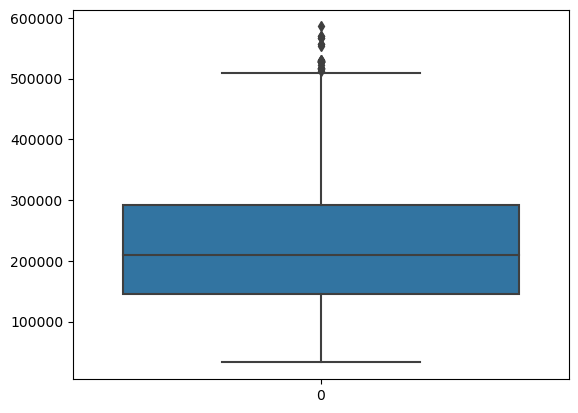

In [3]:
# Mengecek outliers pada target
sns.boxplot(df['SalePrice'])
plt.show()

Dari hasil boxplot diatas bisa dilihat bahwa target terdistribusi miring ke kanan

In [4]:
# Mengecek jumlah apartment berdasarkan dari stasiun terdekat dan tipe hallway

print(f"Jumlah apartment berdasarkan dari stasiun terdekat: \n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah apartment berdasarkan dari tipe hallway: \n{df['HallwayType'].value_counts()}")

Jumlah apartment berdasarkan dari stasiun terdekat: 
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Jumlah apartment berdasarkan dari tipe hallway: 
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Bisa dilihat di atas bahwa kebanyakan apartment berada di dekat stasiun Kyungbuk_uni_hospital dan Myung_duk dan juga tipe hallway yang paling banyak terjual yaitu terrace dan mixed

In [5]:
# mengecek jumlah apartment pada stasiun terdekat bedasarkan tipe hallway

pd.crosstab(df['SubwayStation'],df['HallwayType'], margins=True).sort_values('All',ascending=False)

HallwayType,corridor,mixed,terraced,All
SubwayStation,,,,
All,464,1131,2528,4123
Kyungbuk_uni_hospital,49,0,1103,1152
Myung-duk,222,555,267,1044
Banwoldang,50,0,479,529
Bangoge,0,502,0,502
Sin-nam,51,0,416,467
no_subway_nearby,41,0,249,290
Chil-sung-market,0,74,0,74
Daegu,51,0,14,65


Berdasarkan hasil di atas, dapat dketahui bahwa kebanyakan tipe hallway apartment yang dekat dengan stasiun Kyungbuk_uni_hospital adalah terraced, sedangkan untuk stasium Myung_duk didominasi oleh tipe hallway mixed. Meskipun perbedaannya tidak terlalu signifikan dengan tipe hallway lainnya

In [6]:
# Mengecek nilai tengah harga berdasarkan stasiun terdekat

pd.crosstab(index = df['SubwayStation'], columns = 'SalePrice', values=df['SalePrice'],aggfunc='median').sort_values('SalePrice',ascending=False)

col_0,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0
Myung-duk,154424.5
Chil-sung-market,88495.0
Daegu,86725.0


Dapat dilihat bahwa apartment yang dekat dengan stasiun Kyungbuk_uni_hospital dan Myung_duk mempunyai harga yang tidak rendah namun tidak tinggi juga

<Axes: xlabel='SubwayStation'>

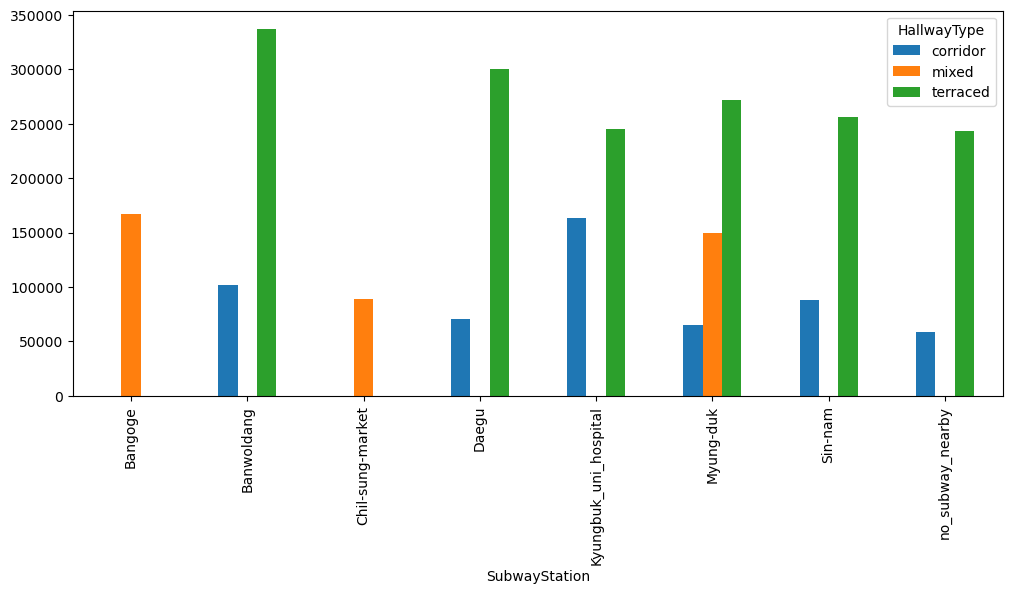

In [7]:
price = pd.crosstab(df['SubwayStation'],df['HallwayType'], values=df['SalePrice'],aggfunc='median')
price.plot.bar(figsize=(12,5))

In [8]:
pd.crosstab(df['SubwayStation'],df['HallwayType'], values=df['SalePrice'],aggfunc='median')

HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


Dari chart di atas kita tahu bahwa apartment yang dekat dengan stasiun Kyungbuk_uni_hospital dengan tipe hallway terraced mempunyai nilai tengah harga yang tinggi dibandingkan dengan tipe hallway corridor. Jadi kita bisa berasumsi bahwa tipe terraced memiliki peminat yang lebih banyak dibandingkan dengan tipe corridor

Sedangkan untuk apartment yang dekat dengan stasiun Myung_duk dengan tipe terraced juga mempunyai nilai tengah harga yang tinggi dibandingkan dengan tipe hallway lainnya

# Data Preprocessing
Data processing merupakan tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan data mining

Selanjutnya kita akan mengecek tipe data, missing value, persentasi dari mssing value, number of unique values dan unique values sample

In [9]:
FeatureCheck = []

for i in df.columns:
    FeatureCheck.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

DfFeatureCheck= pd.DataFrame(data = FeatureCheck,
columns = [
    'Features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

DfFeatureCheck

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[Sin-nam, Bangoge]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 7.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 2.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[203.0, 798.0]"
7,YearBuilt,int64,0,0.0,16,"[2005, 2009]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[4, 7]"
9,Size(sqf),int64,0,0.0,89,"[2092, 857]"


**Missing Value**




Berdasarkan data frame di atas, bisa dilihat bahwa tidak ada missing value

**Data Type**



Hasil dari pengecekan data type di atas menunjukan bahwa atribut N FacilitiesNearBy (ETC), N FacilitiesNearBy (PublicOffice), N SchoolNearBy (University), dan N Parkinglot (Basement) mempunyai tipe data float, seharusnya tipe datanya adalah integer.

In [10]:
# Mengecek apakah ada angka decimal dalam atribut

print(f"N_FacilitiesNearBy(ETC): {df['N_FacilitiesNearBy(ETC)'].sum()}")
print(f"N_FacilitiesNearBy(PublicOffice): {df['N_FacilitiesNearBy(PublicOffice)'].sum()}")
print(f"N_SchoolNearBy(University): {df['N_SchoolNearBy(University)'].sum()}")
print(f"N_Parkinglot(Basement): {df['N_Parkinglot(Basement)'].sum()}")

N_FacilitiesNearBy(ETC): 7961.0
N_FacilitiesNearBy(PublicOffice): 17050.0
N_SchoolNearBy(University): 11323.0
N_Parkinglot(Basement): 2345901.0


Tidak ada angka decimal dalam atribut maka kita bisa melanjutkan data preprocessing

**Duplicate Data**

In [11]:
df.duplicated().sum()

1422

Kita akan biarkan data duplikat karena tidak ada feature yang bertindak sebagai primary key

In [12]:
df.duplicated().sum()

1422

**Drop Columns**

Kita bisa menggunakan domain knowlegde pada feature selection stage saat ini, yang mana semua features saat ini mempunyai hubungan pada target kita yaitu SalePrice. jadi kita tidak menghilangkan features apapun

**Descriptive Statistical Numerical Features**

Mendeskripsikan semua features untuk melihat apakah ada anomali, contohnya seperti nilai pada feature kurang dari 0 atau SalePrice setara dengan 0

In [13]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


Dapat dilihat bahwa semua features mempunyai nilai asli, jadi kita bisa melanjutkan data preprocessing.

**Data Correlation**

Data Correlation adalah hubungan timbal balik, kovariasi, atau hubungan antara dua variabel atau lebih.
Karena target data tidak berdistribusi normal maka kita menggunakan metode **spearman** untuk melihat korelasi antar features.

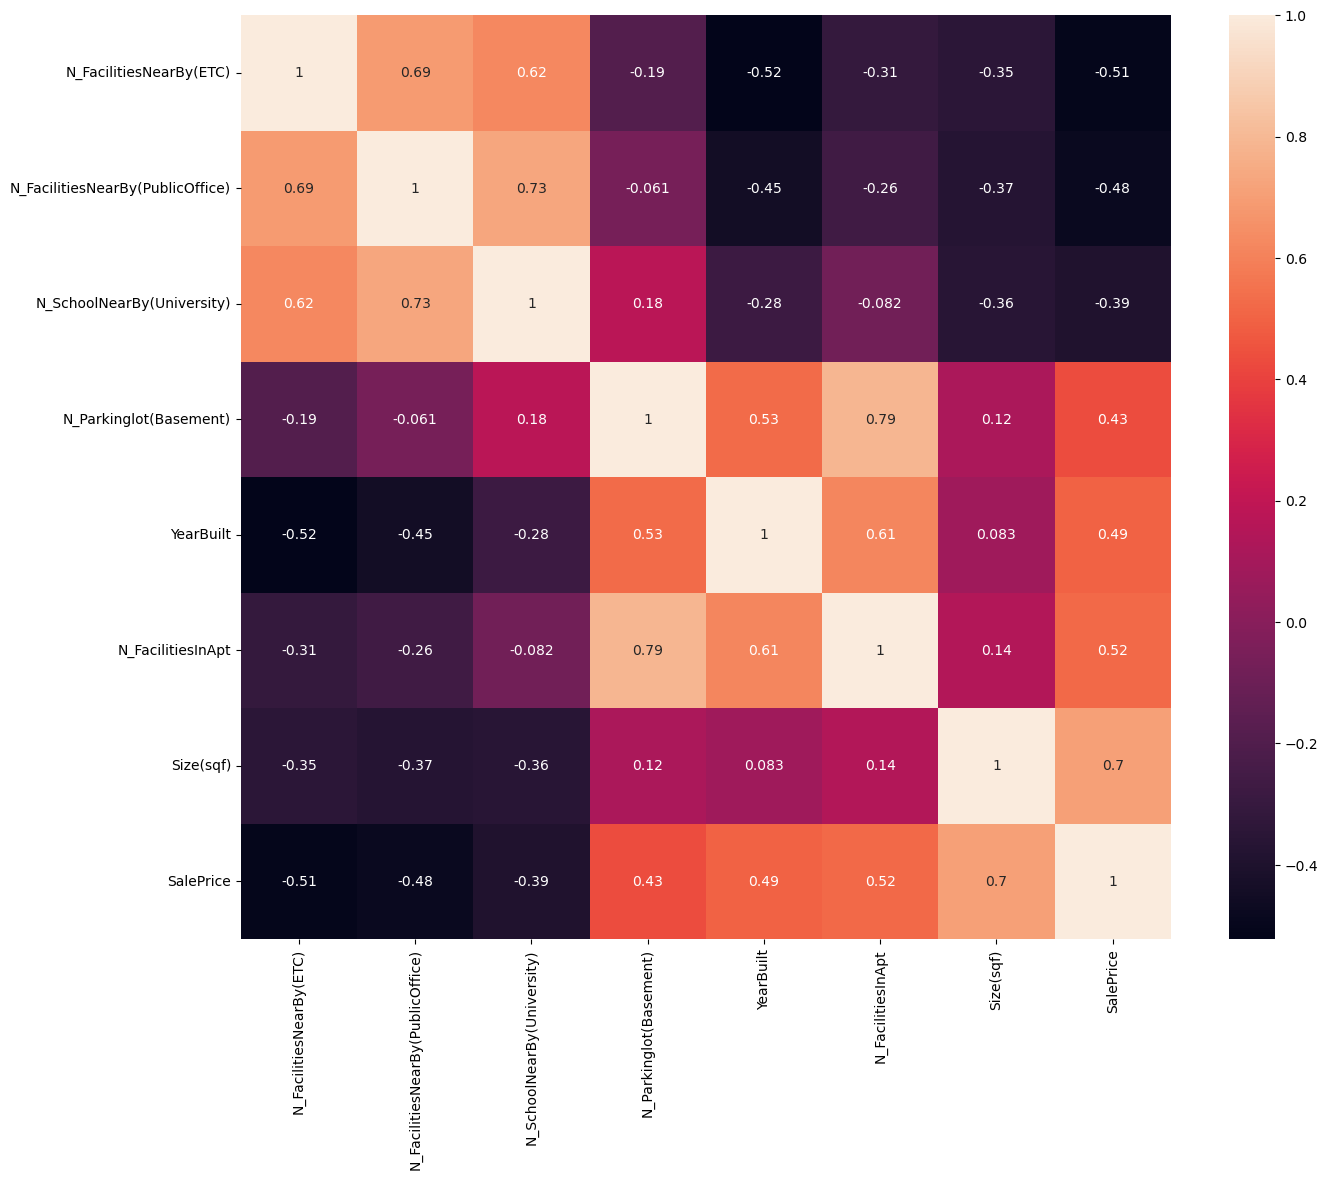

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

Correlation Matrix menunjukkan bahwa feature yang memiliki korelasi paling tinggi dengan feature SalePrice adalah luas satuan (size (sqf)) yaitu sebesar 0,7 artinya semakin luas unit yang terjual maka harganya akan semakin tinggi dan juga tidak terjadi multikolinearitas antar features. Meskipun beberapa features memiliki korelasi yang rendah dengan feature SalePrice, kita tidak akan menghilangkan feature tersebut karena sedikitnya jumlah semua features dalam data.

**Outlier**


Outlier merupakan data yang memiliki karakteristik yang berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai ekstrim baik untuk variabel tunggal atau variabel kombinasi.

<Axes: >

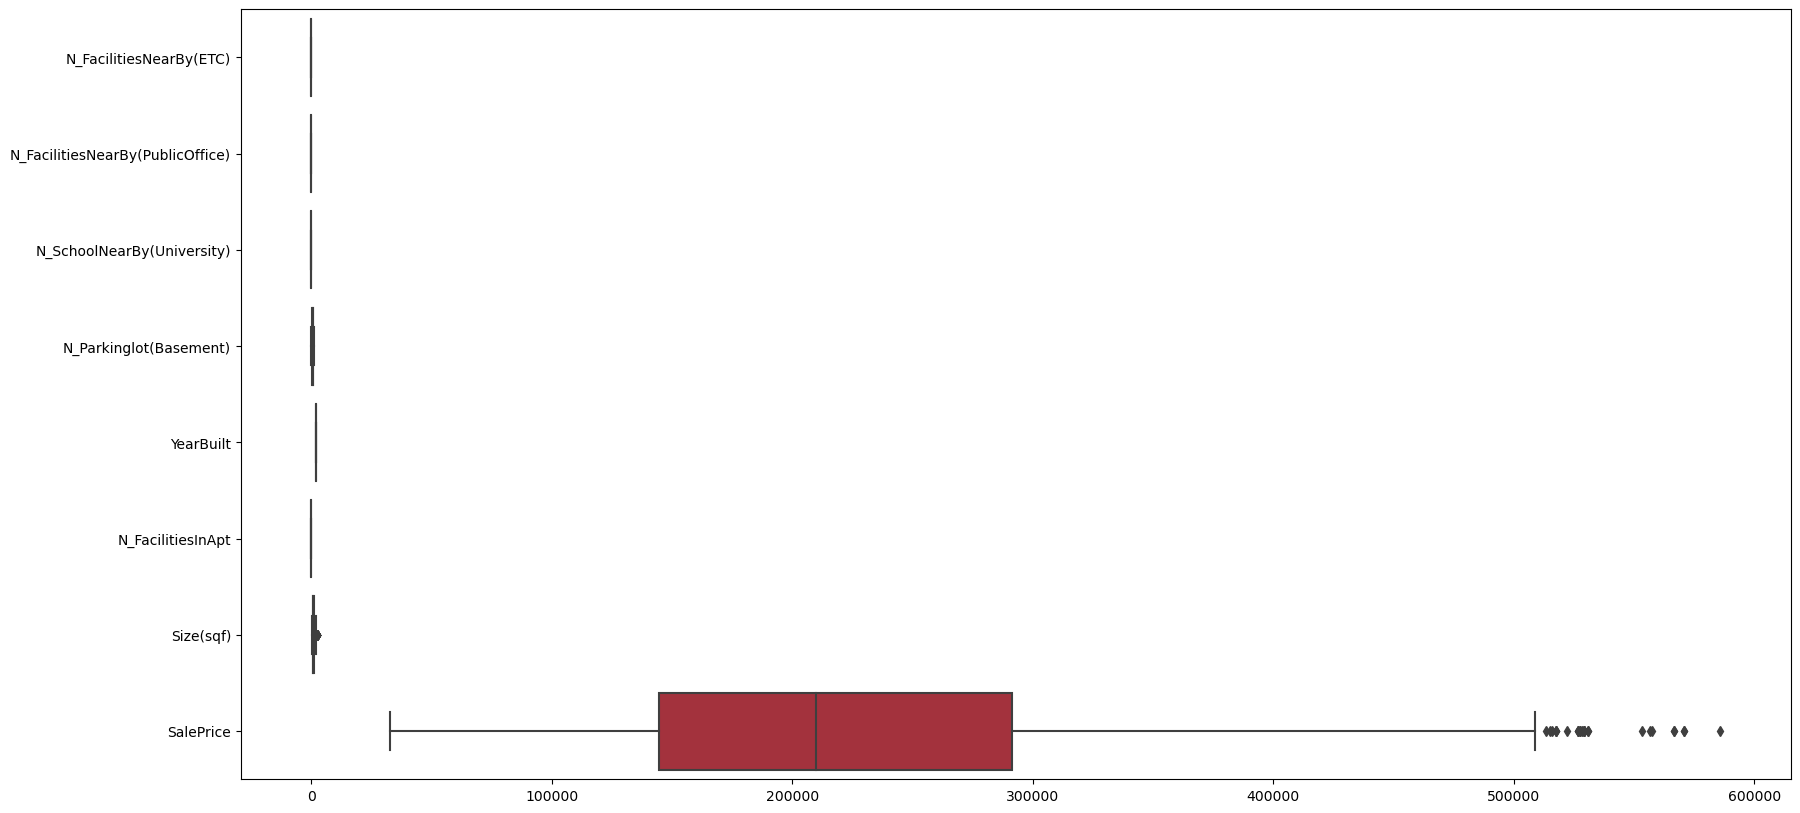

In [15]:
# Plot untuk mengecek apakah ada outlier

plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient="h", palette="RdBu_r")

Dari hasil boxplot di atas terdapat outlier pada beberapa features seperti pada feature SalePrice dan Size (sqf) kemudian akan dilakukan pengolahan pada setiap feature sehingga terdapat keterbatasan data.

In [16]:
# Membuat function untuk mengecek outlier

def check_outlier(col):
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5 * IQR)
    lower_fence = Q1 - (1.5 * IQR)
    return IQR,upper_fence, lower_fence

**SalePrice**

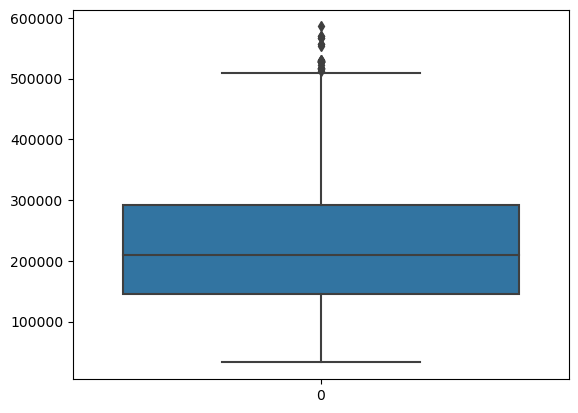

In [17]:
# Plot distribusi data pada feature SalePrice 

sns.boxplot(df['SalePrice'])
plt.show()

In [18]:
# Outlier pada SalePrice feature

IQR, upper_fence, lower_fence = check_outlier('SalePrice')
print("IQR SalePrice")
print('IQR\t\t: ',IQR)
print('Upper Fence\t: ',upper_fence)
print('lower_fence\t: ',lower_fence)

IQR SalePrice
IQR		:  146398.0
Upper Fence	:  510747.0
lower_fence	:  -74845.0


In [19]:
# Mengecek descriptive statistics pada SalePrice feature

df['SalePrice'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [20]:
# Cek SalePrice > 510747.0

print("SalePrice amount > 510747\t\t: ",df[df['SalePrice'] > 510747.0].count()['SalePrice'])
print("Percentage of salePrice amount > 510747\t: ",round((df[df['SalePrice'] > 510747.0].count()['SalePrice'])/4123*100,3),"%")

SalePrice amount > 510747		:  27
Percentage of salePrice amount > 510747	:  0.655 %


Menurut descriptive statistics, kuartil ketiga pada fitur SalePrice bernilai kurang dari $291150, sedangkan nilai maksimumnya sangat besar, yaitu $585840.

Akibatnya data tidak terdistribusi normal sehingga menimbulkan skewness positif. Ada 27 data dalam data kami yang nilai harga jualnya lebih besar dari $291150, atau hanya 0,655% dari data tersebut. Kami akan membuang datanya sehingga skewness dapat dikurangi, yang mengakibatkan model limitiations.

In [21]:
# Filtering data

df = df[df['SalePrice'] <= 510747]

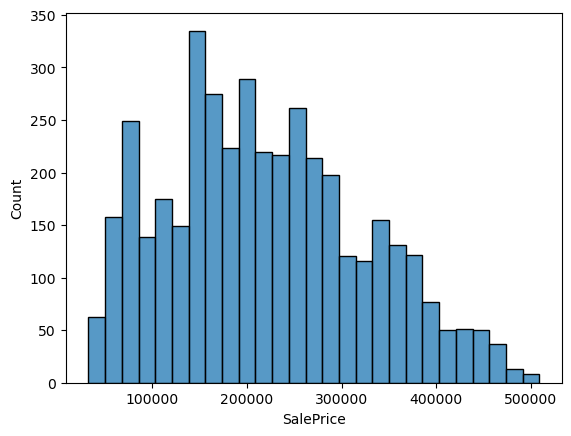

In [22]:
# Distribusi data setelah filtering

sns.histplot(data=df, x="SalePrice")
plt.show()

Kemiringan distribusi data telah berkurang seperti yang terlihat pada plot di atas.

In [23]:
# Mengecek descriptive statistics pada SalePrice feature setelah filtering

df['SalePrice'].describe()

count      4096.000000
mean     219692.548828
std      103961.039574
min       32743.000000
25%      144752.000000
50%      207964.000000
75%      287610.000000
max      508849.000000
Name: SalePrice, dtype: float64

**Size(sqf)**

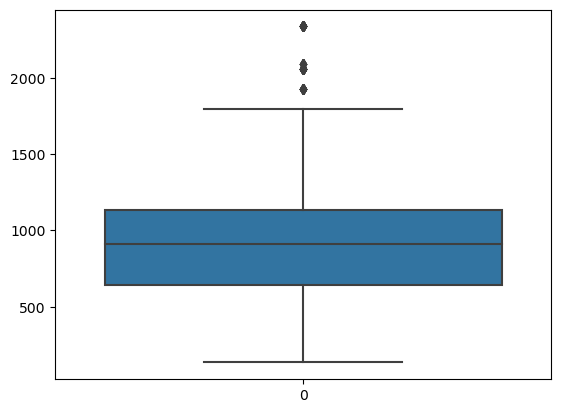

In [24]:
# Plot distribusi data pada size(sqf) feature

sns.boxplot(df['Size(sqf)'])
plt.show()

In [25]:
# Outlier pada Size(sqf) feature

IQR, upper_fence, lower_fence = check_outlier('Size(sqf)')
print("IQR Size(sqf)")
print('IQR\t\t: ',IQR)
print('Upper Fence\t: ',upper_fence)
print('lower_fence\t: ',lower_fence)

IQR Size(sqf)
IQR		:  487.0
Upper Fence	:  1861.5
lower_fence	:  -86.5


In [26]:
# Mengecek descriptive statistics pada the Size(sqf) feature

df['Size(sqf)'].describe()

count    4096.000000
mean      949.107178
std       378.608713
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [27]:
# Cek Size(sqf) > 1861.5

print("Size(sqf) amount > 1861.5\t\t: ",df[df['Size(sqf)'] > 1861.5].count()['Size(sqf)'])
print("Percentage of Size(sqf) amount > 1861.5\t: ",round((df[df['Size(sqf)'] > 1861.5].count()['Size(sqf)'])/4123*100,3),"%")


Size(sqf) amount > 1861.5		:  81
Percentage of Size(sqf) amount > 1861.5	:  1.965 %


Dari boxplot di atas terlihat jelas terdapat outlier, karena persentase outlier sangat kecil yaitu hanya 1.965% maka kita akan membuang semua data yang mempunyai  Size(sqf) lebih besar dari 1861.5.

In [28]:
# Filtering data

df = df[df['Size(sqf)'] <= 1861.5]

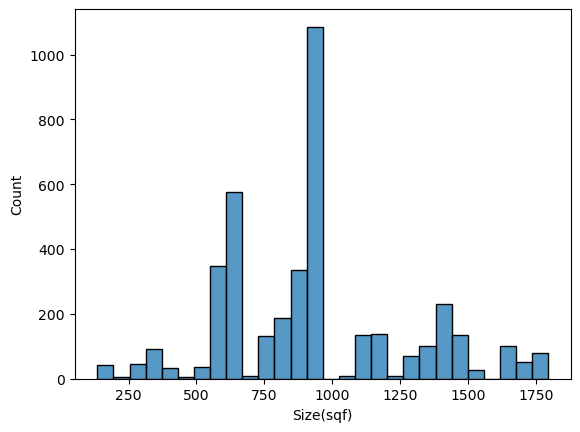

In [29]:
# Distribusi data setelah filtering

sns.histplot(data=df, x="Size(sqf)")
plt.show()

Kemiringan distribusi data telah berkurang seperti terlihat pada plot di atas.

In [30]:
# Mengecek descriptive statistics pada Size(sqf) feature setelah filtering

df['Size(sqf)'].describe()

count    4015.000000
mean      925.216936
std       341.828592
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      1796.000000
Name: Size(sqf), dtype: float64

In [31]:
# Mengecek dataset feature info dari hasil celansing

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4015 non-null   object 
 1   TimeToSubway                      4015 non-null   object 
 2   SubwayStation                     4015 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4015 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4015 non-null   float64
 5   N_SchoolNearBy(University)        4015 non-null   float64
 6   N_Parkinglot(Basement)            4015 non-null   float64
 7   YearBuilt                         4015 non-null   int64  
 8   N_FacilitiesInApt                 4015 non-null   int64  
 9   Size(sqf)                         4015 non-null   int64  
 10  SalePrice                         4015 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 376.4+ KB


Jumlah data yang dibuang sebanyak 108 data atau 2,62% dari total data.

# Modeling


In [32]:
# Import library

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler,PolynomialFeatures, PowerTransformer, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

**Memisahkan Independent Variable Data dari Target**

In [33]:
## Memisahkan Independent Variable Data dari Target
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

**Data Splitting**

In [34]:
# Splitting training dan test data menggunakan proportion of 80:20

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.20,
    random_state=99)

**Memilih 2 best model terbaik melalui cross validation**

Cross Validation adalah teknik yang membantu memastikan model kita yakin akan efisiensi dan keakuratannya pada data yang tidak terlihat. Ini adalah metode untuk mengevaluasi model Machine Learning dengan melatih beberapa model Machine Learning lainnya pada subkumpulan kumpulan data masukan yang tersedia dan mengevaluasinya pada subkumpulan kumpulan data.

**Membuat Machine Learning Pipeline**

Machine Learning Pipeline digunakan untuk membantu mengotomatiskan alur kerja pembelajaran mesin. Mereka beroperasi dengan memungkinkan serangkaian data diubah dan dikorelasikan bersama dalam suatu model yang dapat diuji dan dievaluasi untuk mencapai suatu hasil. Dengan menggunakan pipeline kita juga dapat menghindari kebocoran data, yaitu suatu kondisi dimana model mengetahui kondisi data uji tersebut dapat karena imputasi atau pada saat melakukan fit. Sehingga harus dihindari agar nilai kumpulan tes Matriks evaluasi lebih valid dan dapat dipercaya.


Selanjutnya, kita akan mengelompokkan features berdasarkan tipe data, dengan daftar 'num_columns' berisi feature tipe **numerik** dan daftar 'cat_columns_OHE' dan 'cat_columns_Ordinal' berisi data tipe **kategorikal**. Tujuan pengelompokan adalah untuk mengaktifkan rekayasa feature berdasarkan jenis feature.

In [35]:
# Grouping features by data type

num_columns = ['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','YearBuilt','N_FacilitiesInApt','Size(sqf)' ]
cat_columns_OHE = ['HallwayType','SubwayStation']
cat_columns_Ordinal = ['TimeToSubway']

Lalu buat Cross Validaiton menggunakan Machine Learning Pipeline

In [36]:
## Feature Engineering
# Feature Engineering on numeric Features
num_pipeline = Pipeline([
    ('Scaler',StandardScaler()),
    ('Power',PowerTransformer(method='yeo-johnson'))
])
# Encode Categoric Features using One Hot Encoding
cat_pipeline_OHE = Pipeline([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
# Encode Categoric Feature using Ordinal Encoder
cat_pipeline_Ordinal = Pipeline([
    ('Ordinal', ce.OrdinalEncoder(mapping = [{
                                    'col': 'TimeToSubway', 
                                    'mapping': {'no_bus_stop_nearby': 0, 
                                                '15min~20min': 1, 
                                                '10min~15min': 2, 
                                                '5min~10min': 3,
                                                '0-5min':4}}
                                         ]))
])

## Transform a set of columns
preprocessor = ColumnTransformer([
    ('numeric', num_pipeline, num_columns),
    ('categoric_OHE', cat_pipeline_OHE, cat_columns_OHE),
    ('categoric_Ordinal',cat_pipeline_Ordinal, cat_columns_Ordinal)
])

## Define a set of algorithms to be tested
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=99), RandomForestRegressor(random_state=99), XGBRegressor(random_state=99)]

## List declaration for storing r2, MAE, MAPE values
r2_mean = []
r2_std = []

MAE_mean = []
MAE_std = []

MAPE_mean = []
MAPE_std = []

## Iterations to test the model
for model in models:
    kf = KFold(n_splits=5)

    estimator = Pipeline([
        ('prep', preprocessor),
        ('algo', model)
    ])

    # R2 Score
    cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=kf, 
        scoring='r2', 
        )

    r2_mean.append(cv_r2.mean())
    r2_std.append(cv_r2.std())

    # MAE
    cv_MAE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = kf,
        scoring = 'neg_mean_absolute_error'
    )

    MAE_mean.append(cv_MAE.mean())
    MAE_std.append(cv_MAE.std())

    # MAPE
    cv_MAPE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring='neg_mean_absolute_percentage_error'
    )

    MAPE_mean.append(cv_MAPE.mean())
    MAPE_std.append(cv_MAPE.std())

**Feature Engineering**


Feature Engineering adalah proses mengekstraksi feature dari kumpulan data dan membantu model prediktif dalam merepresentasikan masalah mendasar dengan lebih baik, sehingga meningkatkan akurasi model dalam memprediksi data.

1. Numeric
- Feature Scaling 
- Standard Scaler
- Power Transform (Yeo-Johnson)

2. Categoric
- Ordinal Encoding
- One Hot Encoding

**Evaluation Matrix**

In [37]:
# Hasil evaluasi dari 5 base model menggunakan polynomial features

eva_matrix_base = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'R2_Mean' : r2_mean,
    'R2_Std' : r2_std,
    'MAE_Mean': MAE_mean,
    'MAE_Std': MAE_std,
    'MAPE_Mean': MAPE_mean,
    'MAPE_Std': MAPE_std
})

In [38]:
# Mengurutkan evaluation matrix berdasarkan r2 mean

eva_matrix_base.sort_values('R2_Mean',ascending=False)

,Model,R2_Mean,R2_Std,MAE_Mean,MAE_Std,MAPE_Mean,MAPE_Std
4,XGBoost Regressor,0.831796,0.010871,-33393.799687,822.151260,-0.183476,0.004540
2,DecisionTree Regressor,0.831795,0.010886,-33397.562519,835.463923,-0.183464,0.004556
3,RandomForest Regressor,0.831490,0.010869,-33406.759031,835.620650,-0.183788,0.004982
0,Linear Regression,0.776933,0.020802,-39835.628482,1836.247058,-0.222828,0.006551
1,KNN Regressor,NaN,NaN,NaN,NaN,NaN,NaN


Algoritma yang paling stabil adalah Decision Tree Regressor dan XGBoost Regressor, selanjutnya kita akan melakukan tuning pada hyperparameter untuk mendapatkan hasil terbaik dari model.

**Hyperparameter Tunning**

Hyperparameter adalah parameter yang terdapat dalam Machine Learning, dan kita akan melakukan proses penyetelan pada parameter tersebut dengan mencoba beberapa nilai parameter yang masuk akal dari algoritme untuk mendapatkan hasil terbaik dari model.

**XGBoost Algorithm**

Selanjutnya, kita akan melakukan tuning hyperparameter pada algoritma XGBoost

In [39]:
# defines xgboost parameter
param_XGB = {
    "algo__n_estimators" : [100, 150],
    "algo__max_depth" : [1, 2, 3],
    "algo__learning_rate" : np.logspace(-3, 0, 4),
    "algo__gamma" : np.logspace(-3, 2, 6),
    "algo__colsample_bytree" : [.3, .5, .7],
    "algo__subsample" : [.3, .5, .7],
    "algo__reg_alpha" : np.logspace(-3, 3, 7), 
    "algo__reg_lambda" : np.logspace(-3, 3, 7)

}

**Hyperparameter di XGBoost**

- n_estimators = Jumlah trees.
- max_dept = Kedalaman maksimum suatu tree, namun semakin dalam tree maka modelnya akan semakin kompleks dan menyebabkan overfit, nilai maksimum yang digunakan biasanya 6.
- learning_rate = Nilai ini mengurangi bobot fitur baru di setiap langkah peningkatan, mencegah overfitting atau minimum lokal. Angka ini harus antara 0 dan 1.
- gamma = Istilah regularisasi yang berhubungan dengan kompleksitas model. Ini adalah jumlah kerugian terkecil yang diperlukan agar daun terbelah.
- colsample_bytree = Fraksi kolom yang akan dijadikan subsampel. Hal ini terkait dengan kecepatan algoritma dan pencegahan overfitting.
- subsample = Rasio subsampel instance pelatihan. Jika disetel ke 0,5, XGBoost akan mengambil sampel secara acak setengah dari data pelatihan sebelum menanam pohon. Ini akan membantu menghindari overfitting.
- reg_lambda = Pada bobot, ada istilah regularisasi L2. Dengan meningkatkan nilai ini, model menjadi lebih konservatif.
- reg_alpha = Regularisasi L1 pada bobot. Seperti lambda, dengan meningkatkan nilai ini, model menjadi lebih konservatif.

**Grid Search**

Kita akan melakukan penyetelan hyperparameter menggunakan grid search, di mana grid search bekerja dengan cara membuat grid di atas ruang pencarian dan mengevaluasi model untuk semua kemungkinan hyperparameter. Ini bagus dalam arti lugas dan komprehensif. Sisi negatifnya, jika ruang pencariannya besar, maka akan sangat mahal dalam hal waktu komputasi.

Grid Search lebih disukai daripada Random Search karena Random Search hanya menggunakan sekumpulan hyperparameter acak, sedangkan kami menginginkan kombinasi parameter terbaik.

In [41]:
# Defines pipelines pada XGBoost models
estimator_xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(random_state=99))
])

# Define number of folds
kf = KFold(n_splits=2)

# Melakukan grid search CV
XGB_GS = GridSearchCV(estimator_xgb, 
                    param_XGB, 
                    cv= kf, 
                    n_jobs=-1, 
                    verbose=1, 
                    scoring='r2'
                    )

# Fitting data training 
XGB_GS.fit(X_train, y_train)

Fitting 2 folds for each of 63504 candidates, totalling 127008 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          StandardScaler()),
                                                                                         ('Power',
                                                                                          PowerTransformer())]),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_SchoolNearBy(University)',
                                                                          'N_Parkinglot(Basement)',
                                                                          'YearBuilt',
                                                                          'N_F...
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'algo__learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'algo__max_depth': [1, 2, 3],
                         'algo__n_estimators': [100, 150],
                         'algo__reg_alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__reg_lambda': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__subsample': [0.3, 0.5, 0.7]},
             scoring='r2', verbose=1)

In [42]:
# Menunjukan score terbaik dan juga combination of parameters used

print("Best Tuning Score : ",XGB_GS.best_score_)
print("Best Parameter : ",XGB_GS.best_params_)

Best Tuning Score :  0.8303071075509385
Best Parameter :  {'algo__colsample_bytree': 0.7, 'algo__gamma': 0.001, 'algo__learning_rate': 0.1, 'algo__max_depth': 3, 'algo__n_estimators': 150, 'algo__reg_alpha': 1000.0, 'algo__reg_lambda': 1.0, 'algo__subsample': 0.5}


In [43]:
# XGB_GS_Tuned variables yang mempunyai paramater combinations terbaik

XGB_GS_Tuned = XGB_GS.best_estimator_

In [44]:
# Membuat function evaluation matrix

def Eva_Matrix_Base(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_tr)
    y_pred_ts = Model.predict(X_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MAPE_test = mean_absolute_percentage_error(y_test, y_pred_ts)
    eva_data = {
    "Training" + Nama : [R2_train, MAE_train, MAPE_train ],
    "Testing" + Nama : [R2_test, MAE_test, MAPE_test, ],
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MAPE'])
        
    return df

In [45]:
# Menampilkan XGB model testing setelah tuning dengan data testing 

df_XGB_GS_Tuned = Eva_Matrix_Base(XGB_GS_Tuned, X_train, X_test, y_train, y_test, 'XGB GS Tuned')
df_XGB_GS_Tuned

,TrainingXGB GS Tuned,TestingXGB GS Tuned
R2,0.840798,0.838714
MAE,32530.158567,32490.114896
MAPE,0.179341,0.177990


Dari hasil evaluation matrix di atas, bisa kita lihat bahwa nilai R2 score dari Training data adalah 0.84 dan testing data adalah 0.83

**Decision Tree Algorithm**

Selanjutnya, kita akan melakukan hyperparameter tuning pada decision tree algorithm

In [46]:
# defines Decision Tree parameter
param_dt = {
    
    "algo__max_features" : np.arange(0.1,1,0.1),
    "algo__max_depth": np.arange(2,20),
    "algo__min_samples_split" : np.arange(2,20),
    "algo__min_samples_leaf"  : np.arange(1,20),
    
}

**Hyperparameter pada Decision Tree**

- max_features = Jumlah maksimum feature yang diperhitungkan saat memisahkan sebuah node.
- max_ depth = Setiap decision tree mempunyai jumlah level maksimum.
- min_samples_split = Jumlah minimum titik data yang dapat ditempatkan dalam sebuah node sebelum dipecah.
- min_samples_leaf = Node daun hanya dapat memiliki sejumlah titik data tertentu.

In [47]:
# Defines pipelines on XGBoost models
estimator_dt = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor(random_state=99))
])

# Define number of folds
kf = KFold(n_splits=2)

# Melakukan grid search CV
DT_GS = GridSearchCV(estimator_dt, 
                    param_dt, 
                    cv= kf, 
                    n_jobs=-1, 
                    verbose=1, 
                    scoring='r2'
                    )

# Fitting data training 
DT_GS.fit(X_train, y_train)


Fitting 2 folds for each of 55404 candidates, totalling 110808 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          StandardScaler()),
                                                                                         ('Power',
                                                                                          PowerTransformer())]),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_SchoolNearBy(University)',
                                                                          'N_Parkinglot(Basement)',
                                                                          'YearBuilt',
                                                                          'N_F...
                                        DecisionTreeRegressor(random_state=99))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'algo__max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'algo__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'algo__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='r2', verbose=1)

In [49]:
# Menunjukan score terbaik dan juga combination of parameters yang telah dipakai

print("Best Tuning Score : ",DT_GS.best_score_)
print("Best Parameter : ",DT_GS.best_params_)

Best Tuning Score :  0.8280842893500049
Best Parameter :  {'algo__max_depth': 11, 'algo__max_features': 0.9, 'algo__min_samples_leaf': 1, 'algo__min_samples_split': 17}


In [50]:
# DT_GS_Tuned variables yang mempunyai paramater combinations terbaik

DT_GS_Tuned = DT_GS.best_estimator_

In [51]:
# Menampilkan Decision Tree model testing setelah tuning dengan data testing 

df_DT_GS_Tuned = Eva_Matrix_Base(DT_GS_Tuned, X_train, X_test, y_train, y_test, 'DT GS Tuned')

In [52]:
df_DT_GS_Tuned

,TrainingDT GS Tuned,TestingDT GS Tuned
R2,0.842487,0.838948
MAE,32277.820263,32457.800865
MAPE,0.177265,0.176406


Dari hasil evaluation matrix terlihat hasil nilai R2 Score dari model Decision Tree pada data latih sebesar 0,84 dan pada data uji sebesar 0,838.

**Perbandingan dari Hasil Evaluation Matrix**

In [58]:
# Menampilkan XGBoost and Decision Tree models setelah tuning

pd.concat([df_XGB_GS_Tuned,df_DT_GS_Tuned], axis=1)

,TrainingXGB GS Tuned,TestingXGB GS Tuned,TrainingDT GS Tuned,TestingDT GS Tuned
R2,0.840798,0.838714,0.842487,0.838948
MAE,32530.158567,32490.114896,32277.820263,32457.800865
MAPE,0.179341,0.177990,0.177265,0.176406


Dari evaluation matrix di atas terlihat bahwa model terbaik adalah XGBoost yang menghasilkan nilai pelatihan dan pengujian R2 Score sebesar 0,84 dan 0,839. Kemudian pada hasil pengujian XGB tuned memiliki MAE sebesar 32618.4 dan MAPE sebesar 0.179.

In [59]:
# Menampilkan XGBoost model sebelum dan sesudah tuning

df_estimator_XGB = Eva_Matrix_Base(estimator_xgb, X_train, X_test, y_train, y_test, 'XGB GS')
pd.concat([df_estimator_XGB, df_XGB_GS_Tuned],axis=1)

,TrainingXGB GS,TestingXGB GS,TrainingXGB GS Tuned,TestingXGB GS Tuned
R2,0.842692,0.839071,0.840798,0.838714
MAE,32232.503575,32439.658001,32530.158567,32490.114896
MAPE,0.176887,0.176515,0.179341,0.177990


Dari hasil evaluation matrix di atas terlihat bahwa hasil R2 Score algortima XGBoost meningkat setelah dilakukan tuning yaitu kurang lebih 0,0001 atau 0,01% ketika diuji menggunakan data pengujian, namun nilai MAPE meningkat kurang lebih 0,003 atau 0,3%. Sedangkan nilai MAE mengalami penurunan.

# Conclusion

Berdasarkan hasil Evaluation Matrix, model terbaik setelah tuning adalah XGBoost dengan R2 score yaitu 0.839 atau 83.9% menanadakan bahwa model sudah cukup baik menjelaskan variasi dalam Y value

Model ini juga memiliki rata-rata persentase probabilitas kesalahan (MAPE) sebesar 0,179 atau 17,9% yang berarti prediksi harga apartemen dapat menyimpang dari harga sebenarnya sebesar 17,77%, yang bisa lebih tinggi atau lebih rendah dari harga aslinya. Harga rata-rata apartemen adalah 32618,4 won.

Model yang dibuat juga memiliki keterbatasan yaitu hanya dapat memprediksi apartemen dengan biaya kurang dari $510747 dan memiliki luas ruangan kurang dari 32397 sqf.

# Recomendations

Beberapa rekomendasi yang kami berikan untuk peningkatan kemampuan model untuk memprediksi harga apartment yaitu:
- Menambahkan features yang memungkinkan berhubungan dengan SalesPrice seperti jumlah lantai apartment, jumlah kamar, sudah full furnished atau belum, jumlah apartment employees, kapasitas parkir kendaraan dan lainnya.
- Menambahkan jumlah data apartment terbaru
- Mempertimbangkan untuk menggunakan model machine learning seperti Recurrent Neural Network (RNN)
- Mempertimbangkan faktor eksternal secara keseluruhan yang berdampak pada harga jual apartment, seperti tingkat suku bunga, indeks harga konsumen, kienrja produk domestik bruto (PDB) dan lain sebagainya.

# Save Model (Pickle)

In [60]:
import pickle

XGB_GS_Tuned.fit(X_train, y_train)

pickle.dump(XGB_GS_Tuned, open('Daegu_Apartment_M3_XGB.sav', 'wb'))